# **Gradiente Descendente**

Neste material, será tratado o conteúdo referente ao gradiente descendente, o qual é aplicado em inúmeros algoritmos de Machine Learning. Este é utilizado para minimizar a função de custo. Dessa maneira, a regressão linear é um bom começo para compreender a questão da minimização desta função. A princípio, iremos utilizar a MSE (Mean Squared) como função de referência para cálculo do erro.

## **Implementação**

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
import random

%matplotlib inline

In [34]:
np.random.seed(1234)

In [35]:
# Número de exemplos
N = 1000

In [36]:
# Input values (features)
x1 = 10.0 * np.random.rand(N, 1)

# True function
y = 2.0*x1

# Observable function
# Output values (targets)
# Gaussian noisy added to function
y_noisy = y + 10.0 * np.random.randn(N, 1)

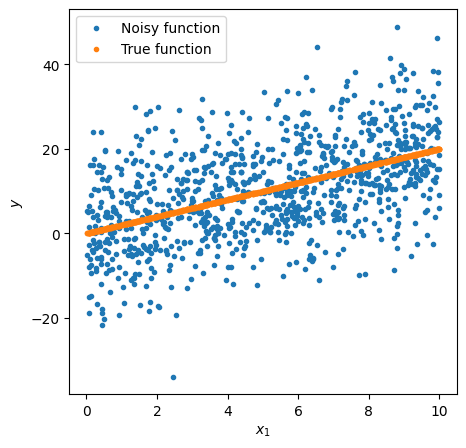

In [37]:
# Showing the true and noisy function
fig = plt.figure(figsize=(5,5))
plt.plot(x1, y_noisy, '.', label='Noisy function')
plt.plot(x1, y, '.', label='True function')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.show()

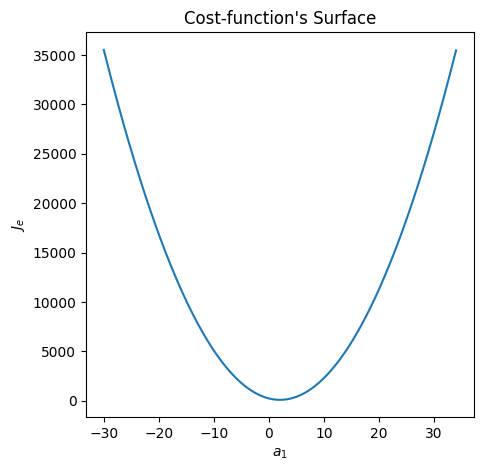

In [38]:
# Generate values for parameters
M = 200
A1 = np.linspace(-30.0, 34.0, M)

# Generate points for plotting the cost-function surface
J = np.zeros((M))

for iter1 in range(0, M):
    yhat = A1[iter1]*x1
    J[iter1] = (1.0/N)*np.sum(np.square(y_noisy-yhat))
    
# Plot cost-function surface
fig = plt.figure(figsize=(5,5))
plt.plot(A1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Surface')

# Show the plot
plt.show()

In [39]:
# Closed-form solution
a1_opt = np.linalg.pinv(np.transpose(x1).dot(x1)).dot(np.transpose(x1).dot(y_noisy))

yhat = a1_opt*x1

Joptimum = (1.0/N)*np.sum(np.power((y_noisy-yhat),2))

print(Joptimum)

99.43362282057217


## **Solução com Gradiente Descendente**

In [62]:
# Maximum number of iteration
maxNumIter = 10000

# Learning step
alpha = 0.01

# Create empty structures
a1_hist = np.zeros((maxNumIter))
Jgd = np.zeros(maxNumIter)

a1 = -30

a1_hist[0] = a1

yhat = a1 * x1

Jgd[0] = (1.0/N)*np.sum(np.power((y_noisy - yhat),2))

error = 1
iteration = 0

while(error > 0.0001 and iteration < maxNumIter+1):
    h = a1 * x1
    
    update = -(2.0/N)*x1.T.dot(y_noisy - h)
    
    a1 = a1 - alpha * update
    
    a1_hist[iteration+1] = a1
    
    yhat = a1 * x1
    
    Jgd[iteration+1] = (1.0/N)*sum(np.power((y_noisy - yhat),2))
    
    error = np.abs(Jgd[iteration]-Jgd[iteration+1])
    
    iteration += 1

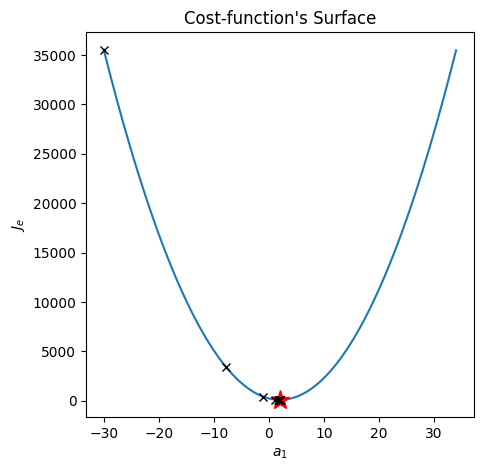

In [63]:
# Plot cost-function surface
fig = plt.figure(figsize=(5,5))
plt.plot(A1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Surface')
plt.plot(a1_opt[0], Joptimum, c='r', marker='*', markersize=14)
plt.plot(a1_hist[0:iteration], Jgd[0:iteration], 'kx')

# Show the plot
plt.show()

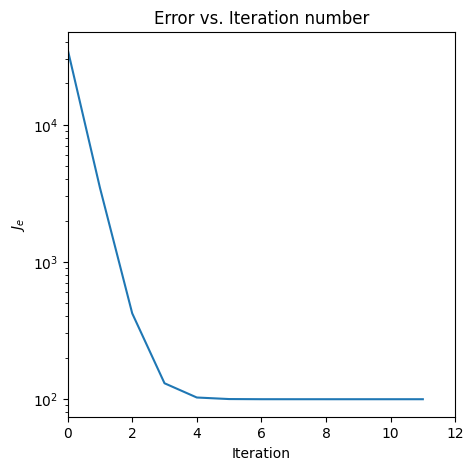

In [61]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0,iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')

plt.show()

In [58]:
print(a1[0][0])
print(a1_opt[0][0])

2.01253417436744
2.0127845339946164
